In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
import seaborn as sns
import scipy.stats

plt.rc('font', family='serif', serif='Times')
# plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('axes', labelsize=18)

/home/ppschmidt/dsr/data-science-retreat-svm/venv3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


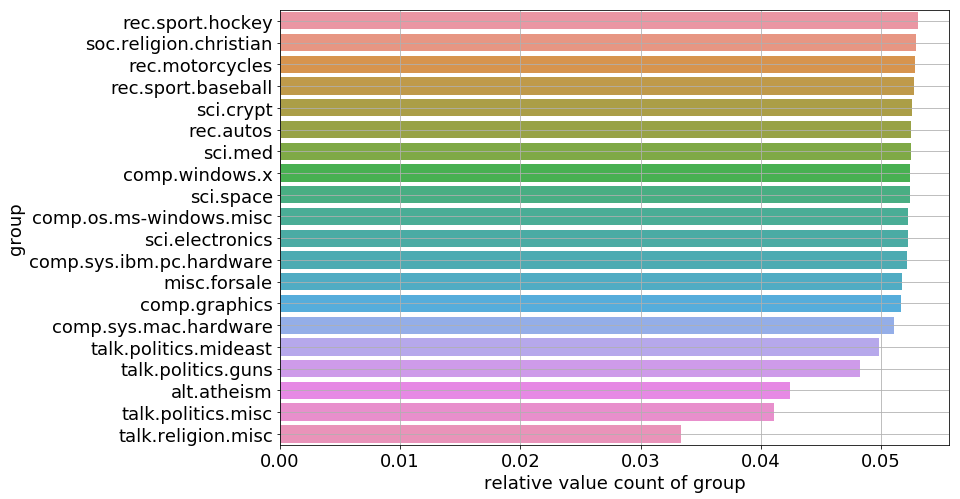

In [2]:
newsgroups_train = fetch_20newsgroups(subset='train', remove=())
df = pd.DataFrame({'group': list(map(lambda t: newsgroups_train.target_names[t], newsgroups_train.target))})
plt.figure(figsize=(12,8))
sns.barplot(y='index', x='group', data=df.group.value_counts(normalize=True).reset_index())
plt.xlabel('relative value count of group')
plt.ylabel('group')
plt.grid(True)

# Wordcounts per newsgroup

In [3]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stopwords = stopwords.words('english')

df = pd.DataFrame(newsgroups_train.data)
df['target'] = pd.Series(newsgroups_train.target)
df.columns = ['post', 'target']

df['n_words'] = df.apply(lambda sample: len(word_tokenize(sample['post'])), axis=1)
df['target_name'] = df.target.map(lambda t: newsgroups_train.target_names[t])

In [4]:
df.describe([0.5, 0.75, 0.9, 0.95, 0.99, 0.999])

,target,n_words
count,11314.000000,11314.000000
mean,9.293000,416.163161
std,5.562719,1283.835870
min,0.000000,23.000000
50%,9.000000,238.000000
75%,14.000000,385.000000
90%,17.000000,644.000000
95%,18.000000,964.000000
99%,19.000000,2835.920000
99.9%,19.000000,27749.575000


In [5]:
scipy.stats.skew(df.n_words), scipy.stats.kurtosis(df.n_words)

(16.88523385011727, 342.5613574473077)

The distribution over the number of words per post have large skewness and kurtosis, to be able to visualize the data better, we'll trim the distribution to p99.

In [6]:
dff = df[df.n_words <= df.n_words.quantile(0.99)]
scipy.stats.skew(dff.n_words), scipy.stats.kurtosis(dff.n_words)

(3.30470966492569, 15.034554547878553)

/home/ppschmidt/dsr/data-science-retreat-svm/venv3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


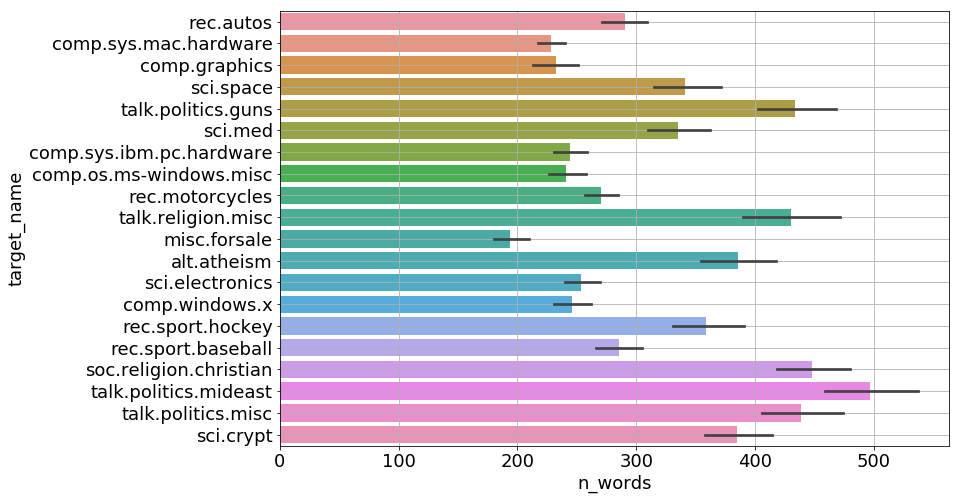

In [7]:
plt.figure(figsize=(12,8))
sns.barplot(y='target_name', x='n_words', orient='h', data=dff)
plt.grid(True)

Let's look at skewness and kurtosis per newsgroup.

In [8]:
def skew(group_n_words):
    return scipy.stats.skew(group_n_words['n_words'])
def kurt(group_n_words):
    return scipy.stats.kurtosis(group_n_words['n_words'])

skew = df.groupby('target_name').agg(skew).iloc[:,0].reset_index()
kurt = df.groupby('target_name').agg(kurt).iloc[:,0].reset_index()

summary = skew
summary['s_skewness'] = summary['post']
del summary['post']
summary['s_kurtosis'] = kurt['post']
summary = summary.sort_values('s_skewness', ascending=False)
summary

,target_name,s_skewness,s_kurtosis
12,sci.electronics,21.284175,490.081670
4,comp.sys.mac.hardware,19.068098,417.946823
8,rec.motorcycles,16.231200,333.490728
16,talk.politics.guns,12.994729,196.422325
10,rec.sport.hockey,12.707614,217.543316
1,comp.graphics,10.928407,126.088982
3,comp.sys.ibm.pc.hardware,9.158181,100.165286
0,alt.atheism,8.381321,93.032970
7,rec.autos,8.029868,106.846674
11,sci.crypt,7.882258,77.036895


pearson r 0.980930982137


/home/ppschmidt/dsr/data-science-retreat-svm/venv3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


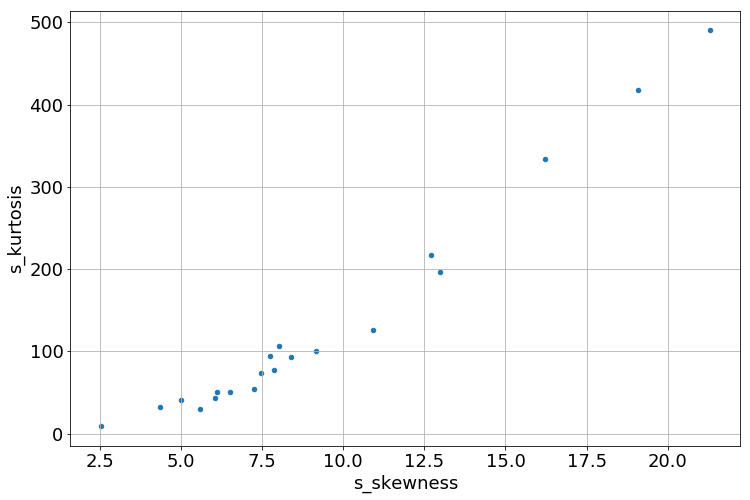

In [9]:
plt.figure(figsize=(12,8))
summary.plot.scatter(x='s_skewness', y='s_kurtosis', figsize=(12,8));
plt.grid(True)
pearsonr, p_value = scipy.stats.pearsonr(summary.s_skewness.values, summary.s_kurtosis.values)
print('pearson r', pearsonr)